## Leaky Integrate and Fire Model

Following the arguments of Gerstner et al (2014), we consider a simple resistor/capacitor (RC) circuit model of a neuron integrating current input. The law of current conservation implies
$$
I(t) = I_R + I_C \\
$$
input current $I(t)$ is split into resistive and capacitive current. Ohm's law implies $I_R = u_R/R$ where $u_R = u - u_{\rm rest}$ is the voltage across the resistor. Capacitive current is $I_C = dq/dt = C du/dt$ where we used the definition of capacity $C = q/u$, so that
$$
I(t) = \frac{u(t) - u_{\rm rest}}{R} + C \frac{du}{dt}. \\
$$
Rearranging and defining $\tau_m = RC$ (since $R$ has units of ohms ($\Omega$) and $C$ has units of farads and ohms times farads equals seconds (the curious reader should look this up!), we have:
$$
\tau_m \frac{du}{dt} = - \left[ u(t) - u_{\rm rest} \right] + RI(t), \\
$$
where $u$ is the membrane potential and $\tau_m$ is the membrane time constant.
    Clearly, as the above equation is linear, it will simply filter any input $I(t)$ with some lag. Therefore, to account for the spiking mechanism of natural neurons, we assume that there is a threshold voltage $u_{\rm th}$ at which a *spike* is initiated, followed by a reset of the voltage to the resting potential. This suggests the following conditional reset equation
$$
{\rm if} \ u(t)\geq u_{\rm th} \ {\rm then} \ u(t^+) \mapsto u_{\rm rest},
$$
and any time $t_j$ at which $u(t_j)\geq u_{\rm th}$ is deemed a *spike time*, leading to a vector of spike times $(t_1, t_2, t_3,...)$. You will study this model in detail on HW1.

Below we instantiate python code associated with the above differential equation (these are called lif_mod.py and lif_per.py in the python code folder). Note, we will want to use numerical methods and plotting, and as such we import *numpy* and *matplotlib*.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Now we can refer to any numpy functions using np.* and any matplotlib python plotting functions using plt.*

To begin, let's use Euler's method to solve the above LIF model in the case of a constant current input $I(t) = \bar{I}$. This requires initializing model parameters and running a for-loop. All relevant model parameters are given (units are in comments):

In [8]:
taum = 1    # membrane time constant (ms)
urest = 0   # resting potential (mV)
R = 1       # resistance (ohms)
I = 2       # input current (mA)
uth = 1     # spiking threshold (mV)

And simulation parameters are given (relevant units also in comments):

In [12]:
T = 2      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (ms)

u = np.zeros(nt)   # vector of voltage entries (mV)
st = 0             # initialize vector of spike times (ms)

If you're a MATLAB user, you will recognize common MATLAB numerical/vector functions in the above, preceded by *np.*. Now we run the for-loop for Euler's method with the timestep (dt) given above:

In [13]:
for j in np.arange(nt-1):
    u[j+1] = u[j]+dt*(R*I-u[j])/taum;
    if u[j+1]>uth:
        u[j+1]=urest;                   # reset the voltage to resting potential
        st = np.append(st,tvec[j+1])    # add on another spike time

So now, we have the vector *u*, which contains all output voltage values from the simulation. Note, we had to insert an *if* statement to instantiate the reset condition and within this reset condition, we updated the spike time vector (with the append function).

Let's conclude by plotting. To do so, we'll use matplotlib (similar to common MATLAB plotting functions). Note there are other ways of plotting in python, but this is perhaps the most accessible to those trained in MATLAB -- commands will look familiar:

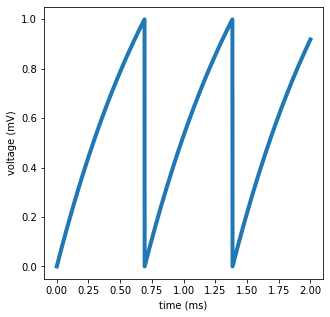

In [14]:
fig = plt.figure(figsize=(5,5))  # initialize figure with a given area in inches
plt.plot(tvec,u,linewidth=4.0)  # plot command with vectors as arguments
plt.xlabel('time (ms)')         # label for x-axis
plt.ylabel('voltage (mV)')      # label for y-axis
plt.show()                      # needed in order to actually produce the plot for you to see

In HW1, you will experiment with the effects of different currents on the spike rate of the neuron, but as you can see above, we provided a large enough current to initiate multiple spikes.

Current inputs need not be constant, we can also consider periodic inputs $I(t) = I_0 + I_1 \sin (\omega t)$. For simplicity, let's present the case $I(t) = A \sin (t)$, so now we must define the parameter $A$ (in mA):

In [15]:
A = 1.5     # current modulation amplitude (mA)

And let's update the time vector to make it a bit longer, and reinitialize the membrane voltage $u$ and spike time vector.

In [16]:
T = 20      # total time to run
dt = 0.001   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array
tvec = np.linspace(0,T,nt)     # time vector (in ms)

u = np.zeros(nt);   # vector of voltage entries
st = 0              # initialize vector to store spike times

And the only update to our previous for-loop needed is the addition of a line defining this periodic input, which will occur first each iteration:

In [17]:
for j in np.arange(nt-1):
    I = A*np.sin(tvec[j])               # 
    u[j+1] = u[j]+dt*(R*I-u[j])/taum    # update the voltage
    if u[j+1]>uth:
        u[j+1]=urest                    # reset the spike voltage
        st = np.append(st,tvec[j+1])    # add spike time to vector

And now we see that the output voltage trace looks quite different due to the oscillating input:

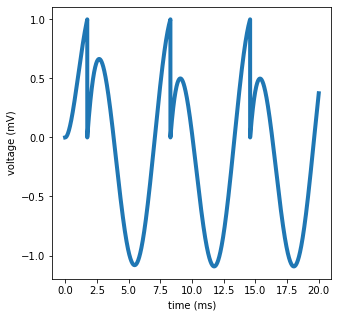

In [19]:
fig = plt.figure(figsize=(5,5))       
plt.plot(tvec,u,linewidth=4.0)
plt.xlabel('time (ms)')
plt.ylabel('voltage (mV)')
plt.show()

You will also look closely at this case in the mathematical analysis and python exercises of HW1. You're welcome to lift any of the above code in doing so.